# Basic Interpolation
In this notebook we will explore how a simple artificial neural network can be used for  1D and 2D data interpolation.

In [17]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection as skm

## 1 Dimensional Interpolation
This is the easiest case for machine learning if we think of neural networks as simple function estimators. Here we will create a function, take a noisy sample, and train a neural network to estimate the function.

Text(0.5, 1.0, 'Randomly Sampled Sine Function')

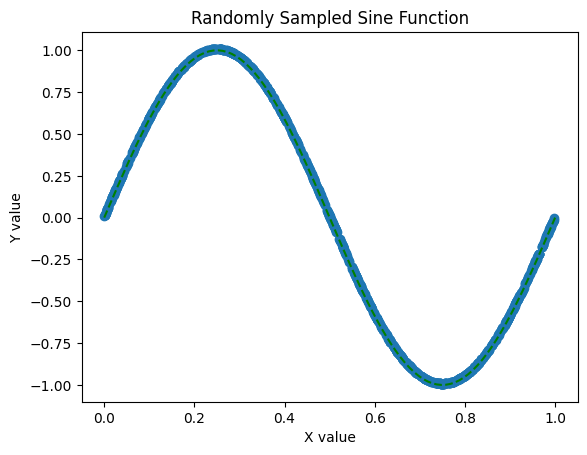

In [48]:
# Define 1D function we want to learn
def function1d(x):
    return np.sin(2*np.pi*x)
# Create sample
x = np.random.random_sample(1000)
y = function1d(x) + 0.1*function1d(np.random.normal(0, 1))
# Plot
plt.scatter(x,y, label='Generated Data')
plt.plot(np.linspace(0,1,100), function1d(np.linspace(0,1,100)), label='Real Sine Function', color='g', linestyle='--')
plt.xlabel('X value')
plt.ylabel('Y value')
plt.title("Randomly Sampled Sine Function")

Now that we have our function (a simple sine function) and our randomly sample data, let's make a simple neural network to estimate this function.

In [57]:
### Model creation: adding layers and compilation
model = Sequential()
model.add(Dense(100, input_dim=1, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mse', metrics=['mse'])


Now we will split the data into a training and test set using sklearn

Text(0.5, 1.0, 'Randomly Sampled Sine Function')

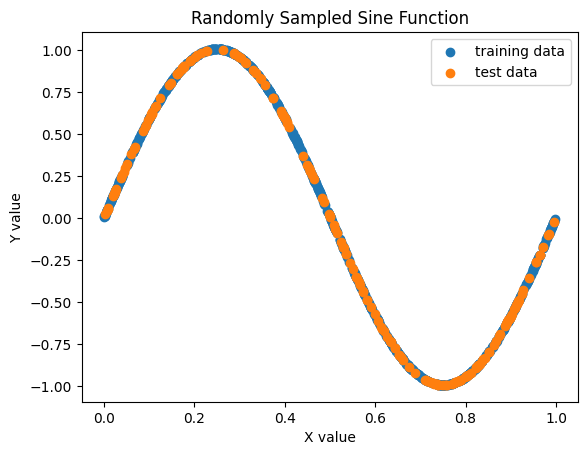

In [58]:
X_train, X_test, y_train, y_test = skm.train_test_split(x, y, test_size=0.2)
plt.scatter(X_train, y_train, label='training data')
plt.scatter(X_test, y_test, label='test data')
plt.legend()
plt.xlabel('X value')
plt.ylabel('Y value')
plt.title("Randomly Sampled Sine Function")

Now we can go ahead and train our network

In [59]:
history = model.fit(X_train, y_train, epochs=20, batch_size=4)
print(history)

Epoch 1/20
200/200 [==============================] - 1s 3ms/step - loss: 0.2107 - mse: 0.2107
Epoch 2/20
200/200 [==============================] - 1s 4ms/step - loss: 0.1255 - mse: 0.1255
Epoch 3/20
200/200 [==============================] - 1s 3ms/step - loss: 0.1002 - mse: 0.1002
Epoch 4/20
200/200 [==============================] - 1s 3ms/step - loss: 0.0732 - mse: 0.0732
Epoch 5/20
200/200 [==============================] - 1s 3ms/step - loss: 0.0528 - mse: 0.0528
Epoch 6/20
200/200 [==============================] - 1s 3ms/step - loss: 0.0399 - mse: 0.0399
Epoch 7/20
200/200 [==============================] - 1s 3ms/step - loss: 0.0276 - mse: 0.0276
Epoch 8/20
200/200 [==============================] - 1s 3ms/step - loss: 0.0174 - mse: 0.0174
Epoch 9/20
200/200 [==============================] - 1s 3ms/step - loss: 0.0104 - mse: 0.0104
Epoch 10/20
200/200 [==============================] - 0s 2ms/step - loss: 0.0048 - mse: 0.0048
Epoch 11/20
200/200 [============================

And let`s now use this trained model to new values

7/7 [==============================] - 0s 2ms/step


Text(0.5, 1.0, 'Randomly Sampled Sine Function')

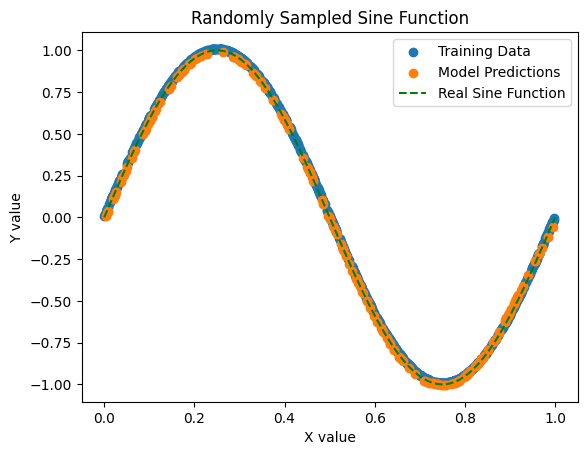

In [60]:
y_pred = model.predict(X_test)

plt.scatter(X_train, y_train, label='Training Data')
plt.scatter(X_test, y_pred, label='Model Predictions')
plt.plot(np.linspace(0,1,100), function1d(np.linspace(0,1,100)), label='Real Sine Function', color='g', linestyle='--')
plt.legend()
plt.xlabel('X value')
plt.ylabel('Y value')
plt.title("Randomly Sampled Sine Function")

Despite having a painfully simple neural network and we didn't apply any hyper-parameter tuning, we were still able to learn the function!

## 2 Dimensional Interpolation

This time we will create a random 2-dimensional field and then go through the same process :)

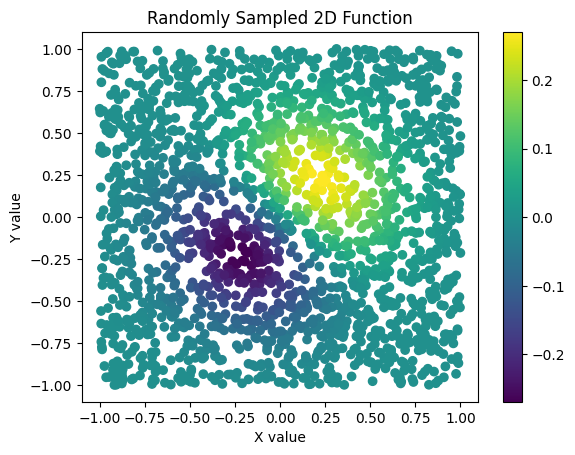

In [106]:
# Define 2D function we want to learn
def function2d(x, y):
    return (x+y)*np.exp(-5.0*(x**2+y**2))
# Create sample
x = 2*np.random.random_sample(2000) - 1
y = 2*np.random.random_sample(2000) - 1
z = function2d(x, y)
# Plot
plt.scatter(x,y, c=z)
plt.xlabel('X value')
plt.ylabel('Y value')
plt.title("Randomly Sampled 2D Function")
plt.colorbar()

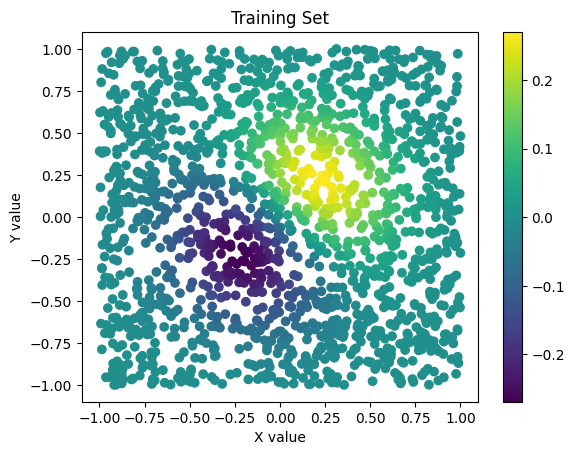

In [108]:
X_train, X_test, y_train, y_test = skm.train_test_split(x, y, test_size=0.2)
# Plot
plt.scatter(X_train, y_train, c=function2d(X_train, y_train))
plt.xlabel('X value')
plt.ylabel('Y value')
plt.title("Training Set")
plt.colorbar()

In [139]:
### Model creation: adding layers and compilation
model2D = Sequential()
model2D.add(Dense(100, input_shape=(None, 2), activation='relu'))
model2D.add(Dense(100, activation='relu'))
model2D.add(Dense(1, activation='linear'))

model2D.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [140]:
# The data is 2 dimensional so we need to get the formatting correct
# Training
input_training = np.column_stack((X_train, y_train))
label_training = function2d(X_train, y_train)
# Test
input_testing = np.column_stack((X_test, y_test))
label_testing = function2d(X_test, y_test)

Epoch 1/20
400/400 [==============================] - 1s 4ms/step - loss: 2.1781e-05 - mse: 2.1781e-05
Epoch 2/20
400/400 [==============================] - 1s 3ms/step - loss: 2.8502e-05 - mse: 2.8502e-05
Epoch 3/20
400/400 [==============================] - 2s 4ms/step - loss: 7.5397e-05 - mse: 7.5397e-05
Epoch 4/20
400/400 [==============================] - 2s 5ms/step - loss: 2.3414e-05 - mse: 2.3414e-05
Epoch 5/20
400/400 [==============================] - 2s 5ms/step - loss: 3.1948e-05 - mse: 3.1948e-05
Epoch 6/20
400/400 [==============================] - 2s 4ms/step - loss: 2.1620e-05 - mse: 2.1620e-05
Epoch 7/20
400/400 [==============================] - 2s 5ms/step - loss: 1.3733e-05 - mse: 1.3733e-05
Epoch 8/20
400/400 [==============================] - 1s 3ms/step - loss: 2.0188e-05 - mse: 2.0188e-05
Epoch 9/20
400/400 [==============================] - 2s 5ms/step - loss: 4.5633e-05 - mse: 4.5633e-05
Epoch 10/20
400/400 [==============================] - 2s 5ms/step - loss

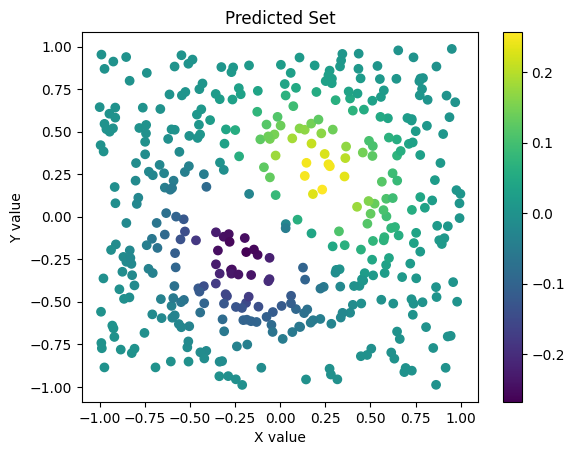

In [144]:
history = model2D.fit(input_training, label_training, epochs=20, batch_size=4)

z_pred = model2D.predict(input_testing)
plt.scatter(X_test, y_test, c=z_pred)
plt.xlabel('X value')
plt.ylabel('Y value')
plt.title("Predicted Set")
plt.colorbar()


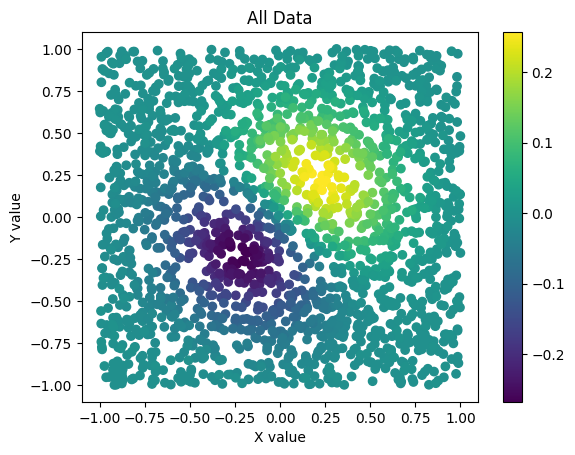

In [146]:
plt.scatter(X_train, y_train, c=function2d(X_train, y_train))
plt.scatter(X_test, y_test, c=z_pred)
plt.xlabel('X value')
plt.ylabel('Y value')
plt.title("All Data")
plt.colorbar()

As we can see, the predicted data fits in nicely (i.e. smoothly) to the real data. Therefore, our network learned the 2D interpolation problem!